In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target


In [2]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the DataFrame
df.head()  # Display the first few rows of the DataFrame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality for visualization (2D plot) using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

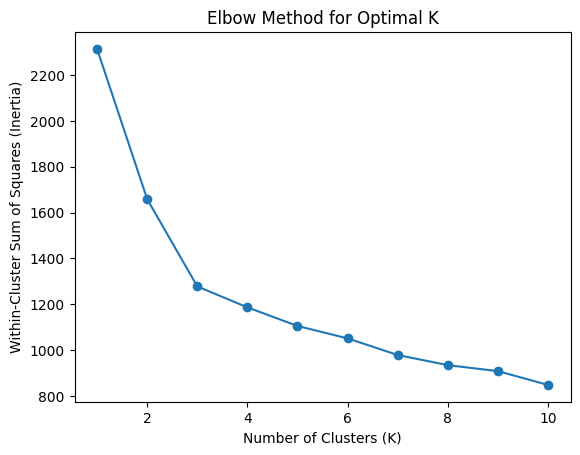

In [18]:
# Calculate inertia for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [38]:
# Perform K-means clustering with K=4.5
kmeans = KMeans(n_clusters=3, random_state=40)
clusters = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, clusters)
print("Davies-Bouldin Index:", db_index)

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_scaled, clusters)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181646
Calinski-Harabasz Index: 70.9400080031512


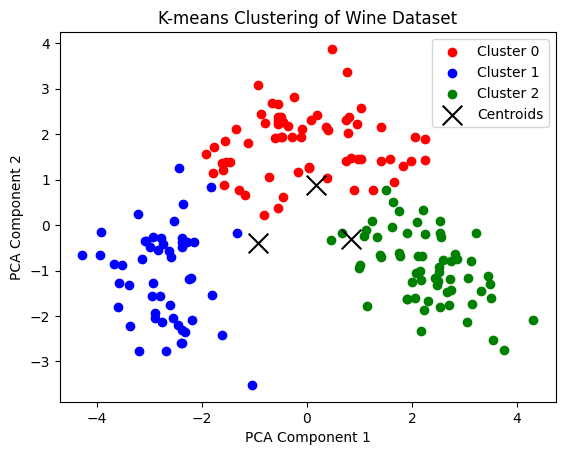

In [37]:
# Create a DataFrame combining the original data, the cluster labels, and PCA components for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['cluster'] = clusters
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters based on the first two PCA components
plt.scatter(df[df['cluster'] == 0]['PCA1'], df[df['cluster'] == 0]['PCA2'], label='Cluster 0', c='red')
plt.scatter(df[df['cluster'] == 1]['PCA1'], df[df['cluster'] == 1]['PCA2'], label='Cluster 1', c='blue')
plt.scatter(df[df['cluster'] == 2]['PCA1'], df[df['cluster'] == 2]['PCA2'], label='Cluster 2', c='green')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Wine Dataset')
plt.legend()
plt.show()


In [8]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=2b7c81a60bf3064ee09641856a82a3765bc96cbf9b7403fde629d79f8baf7388
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=46a4242e90cfb9d90fb0f2637d608e93192c2f979e5791b362f981ffc8f6185d
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


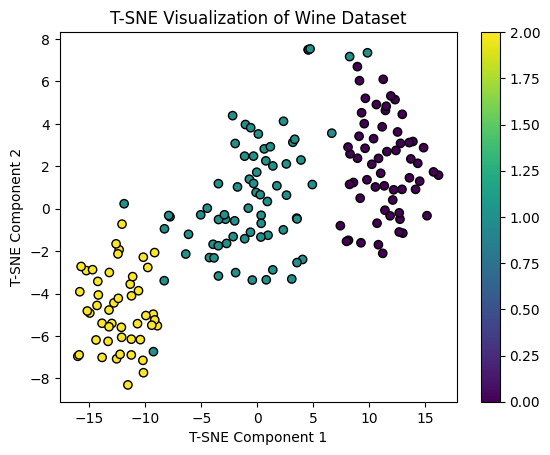

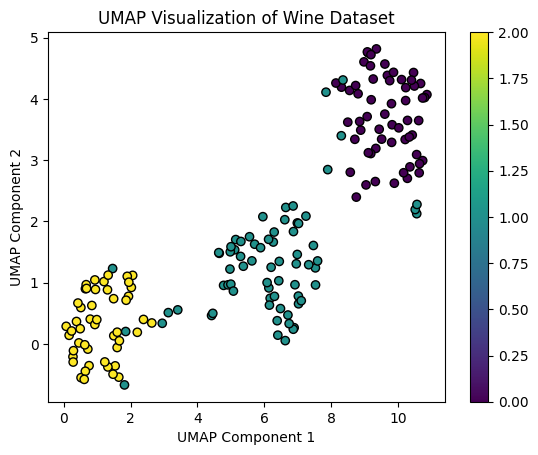

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform T-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Perform UMAP for visualization
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Plot T-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('T-SNE Visualization of Wine Dataset')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar()
plt.show()

# Plot UMAP visualization
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('UMAP Visualization of Wine Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar()
plt.show()


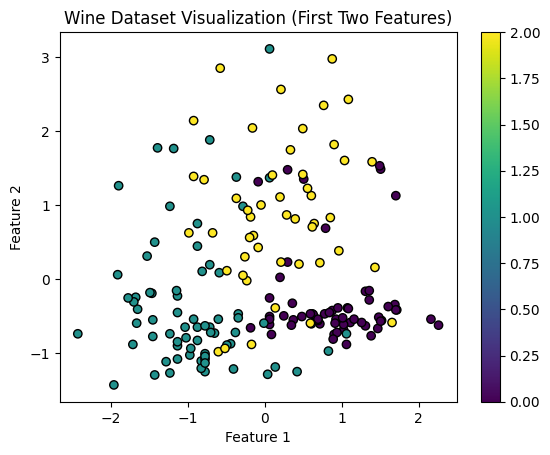

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the first two features for visualization
X_2d = X_scaled[:, :2]

# Plot the Wine dataset using the first two features
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Wine Dataset Visualization (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
